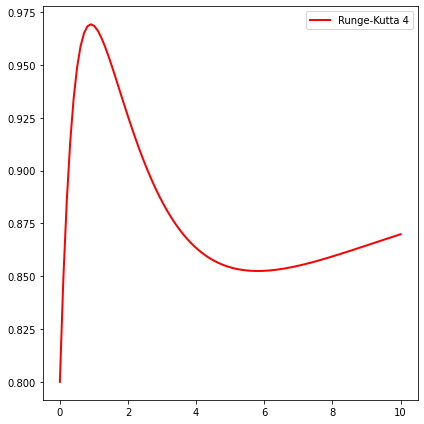

In [36]:
#Solve the non forced using RK4
#here F(t) = 0, therefore we have a homogenous linear equations

# Overdamped case where zeta > 1:

%matplotlib inline
import numpy as np
from math import*
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.
omega_n = 1.
zeta = 1.3

lambda1 = -omega_n * (zeta - sqrt(zeta**2 - 1)) #first solution
lambda2 = -omega_n * (zeta + sqrt(zeta**2 - 1)) #Second solution


fxt = lambda x, t: (lambda1/(lambda1-lambda2))*exp(lambda1*t)+(lambda2/(lambda2-lambda1))*exp(lambda2*t)

def xt_overdamped(sol1, sol2, t):
    return (1/(sol1-sol2))*exp(sol1*t)+(1/(sol2-sol1))*exp(sol2*t)
def vt(sol1,sol2,t):
    return sol1/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)

ti = 0
tf = 10
n = 100
h = (tf-ti)/(n-1)
t = np.linspace(ti, tf, n)
x_overdamped = [xt_overdamped(lambda1, lambda2,tval) for tval in t]


iv = 0.8
x_overdamped[0] = iv   
    
def rk4(ti, xi, h):
    K1 = fxt(ti,xi)
    K2 = fxt(ti+a2*h,xi+b21*K1*h)
    K3 = fxt(ti+a3*h,ti+b31*K1*h+b32*K2*h)
    K4 = fxt(ti+a4*h,ti+b41*K1*h+b42*K2*h+b43*K3*h)   
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return xip1

        
for i in range(1,n):
    t[i] = ti + i*h
    x_overdamped[i] = rk4(t[i-1],x_overdamped[i-1],h)
   
fig = plt.figure(figsize=(6,6))
plt.plot(t, x_overdamped, label="Runge-Kutta 4",color="r",linewidth="2.0")
plt.legend()
plt.tight_layout()
plt.show()

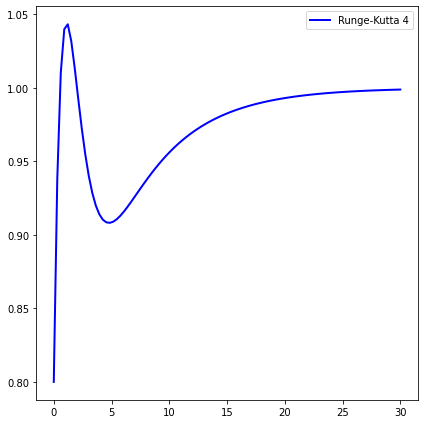

In [26]:
#Solve the non forced using RK4
#here F(t) = 0, therefore we have a homogenous linear equations

# Critically damped case where zeta = 1:

%matplotlib inline
import numpy as np
from math import*
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.
omega_n = 1.


fxt = lambda x, t: exp(-omega_n*t)-t*omega_n*exp(-omega_n*t)

def xt_critdamped(omega_n, t):
    return t*exp(-omega_n*t)

ti = 0
tf = 30
n = 100
h = (tf-ti)/(n-1)
t = np.linspace(ti, tf, n)
x_critdamped = [xt_critdamped(4.,tval) for tval in t]

iv = 0.8
x_critdamped[0] = iv   
    
def rk4(ti, xi, h):
    K1 = fxt(ti,xi)
    K2 = fxt(ti+a2*h,xi+b21*K1*h)
    K3 = fxt(ti+a3*h,ti+b31*K1*h+b32*K2*h)
    K4 = fxt(ti+a4*h,ti+b41*K1*h+b42*K2*h+b43*K3*h)   
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return xip1

        
for i in range(1,n):
    t[i] = ti + i*h
    x_critdamped[i] = rk4(t[i-1],x_critdamped[i-1],h) 
    
fig = plt.figure(figsize=(6,6))
plt.plot(t, x_critdamped, label="Runge-Kutta 4",color="b",linewidth="2.0")
plt.legend()
plt.tight_layout()
plt.show()

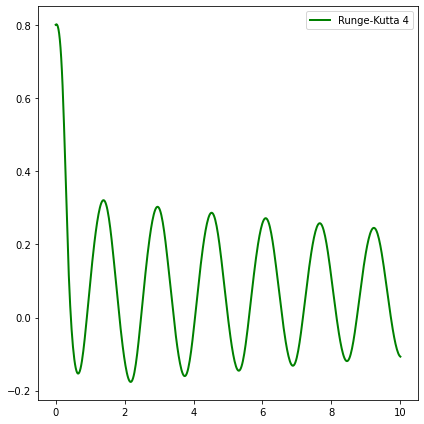

In [35]:
#Solve the non forced using RK4
#here F(t) = 0, therefore we have a homogenous linear equations

# Overdamped case where zeta > 1:

%matplotlib inline
import numpy as np
from math import*
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.
omega_n = 4
zeta = 0.01
omega_d = omega_n*sqrt(1-zeta**2)

fxt = lambda x, t: exp(-zeta*omega_n*t)*((cos(omega_d*t)+zeta*pow(omega_n, 2)/omega_d*sin(omega_d*t)) + (-omega_d*sin(omega_d*t)+zeta*omega_n*cos(omega_d*t)))

def xt_underdamped(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(cos(omega_d*t)+zeta*omega_n/omega_d*sin(omega_d*t))
    

ti = 0
tf = 10.
n = 500
h = (tf-ti)/(n-1)
t = np.linspace(ti, tf, n)
x_underdamped = [xt_underdamped(zeta,omega_n,omega_d,tval) for tval in t]


iv = 0.8
x_underdamped[0] = iv   
    
def rk4(ti, xi, h):
    K1 = fxt(ti,xi)
    K2 = fxt(ti+a2*h,xi+b21*K1*h)
    K3 = fxt(ti+a3*h,ti+b31*K1*h+b32*K2*h)
    K4 = fxt(ti+a4*h,ti+b41*K1*h+b42*K2*h+b43*K3*h)   
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return xip1

        
for i in range(1,n):
    t[i] = ti + i*h
    x_underdamped[i] = rk4(t[i-1],x_underdamped[i-1],h)
    
fig = plt.figure(figsize=(6,6))
plt.plot(t, x_underdamped, label="Runge-Kutta 4",color="g",linewidth="2.0")
plt.legend()
plt.tight_layout()
plt.show()